# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Цель исследования:
Найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

Ход исследования:
Данные будут взяты из файла: real_estate_data.csv.
Так как про данные ничего не известно потребуется провести обзор и предобработку данных. Проверить данные на ошибки и пустые значения. А затем постараться исправить ошибки в данных, чтобы получить максимально достоверный результат.

Этапы исследования:
- Обзор данных;
- Предобработка данных;
- Расчеты и добавление новых столбцов;
- Исследовательский анализ;
- Общий вывод.

### Откройте файл с данными и изучите общую информацию.

In [1]:
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd

In [4]:
# Загружаем файлы
try:
    data = pd.read_csv('/content/real_estate_data.csv', sep='\t', skipinitialspace = True)
except:
    print('Что-то не так с файлом. Проверь файл с данными.')

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Из выведенных выше строк уже можно сделать вывод что есть пропуски в данных. Но вот насколько эти пропуски важны сможем разобраться при дальнейшем иссследовании. Плюс нам точно потребуется преобразование значений столбца first_day_exposition в понятный и удобный для анализа вид даты.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Всего в файле у нас 23699 строк, при этом есть столбцы в которых действительно есть пропуски(которые мы заметили еще из первой таблицы). Вот с ними нам и предстоит разобраться перед тем как приступить к анализу данных и проверке гипотез.

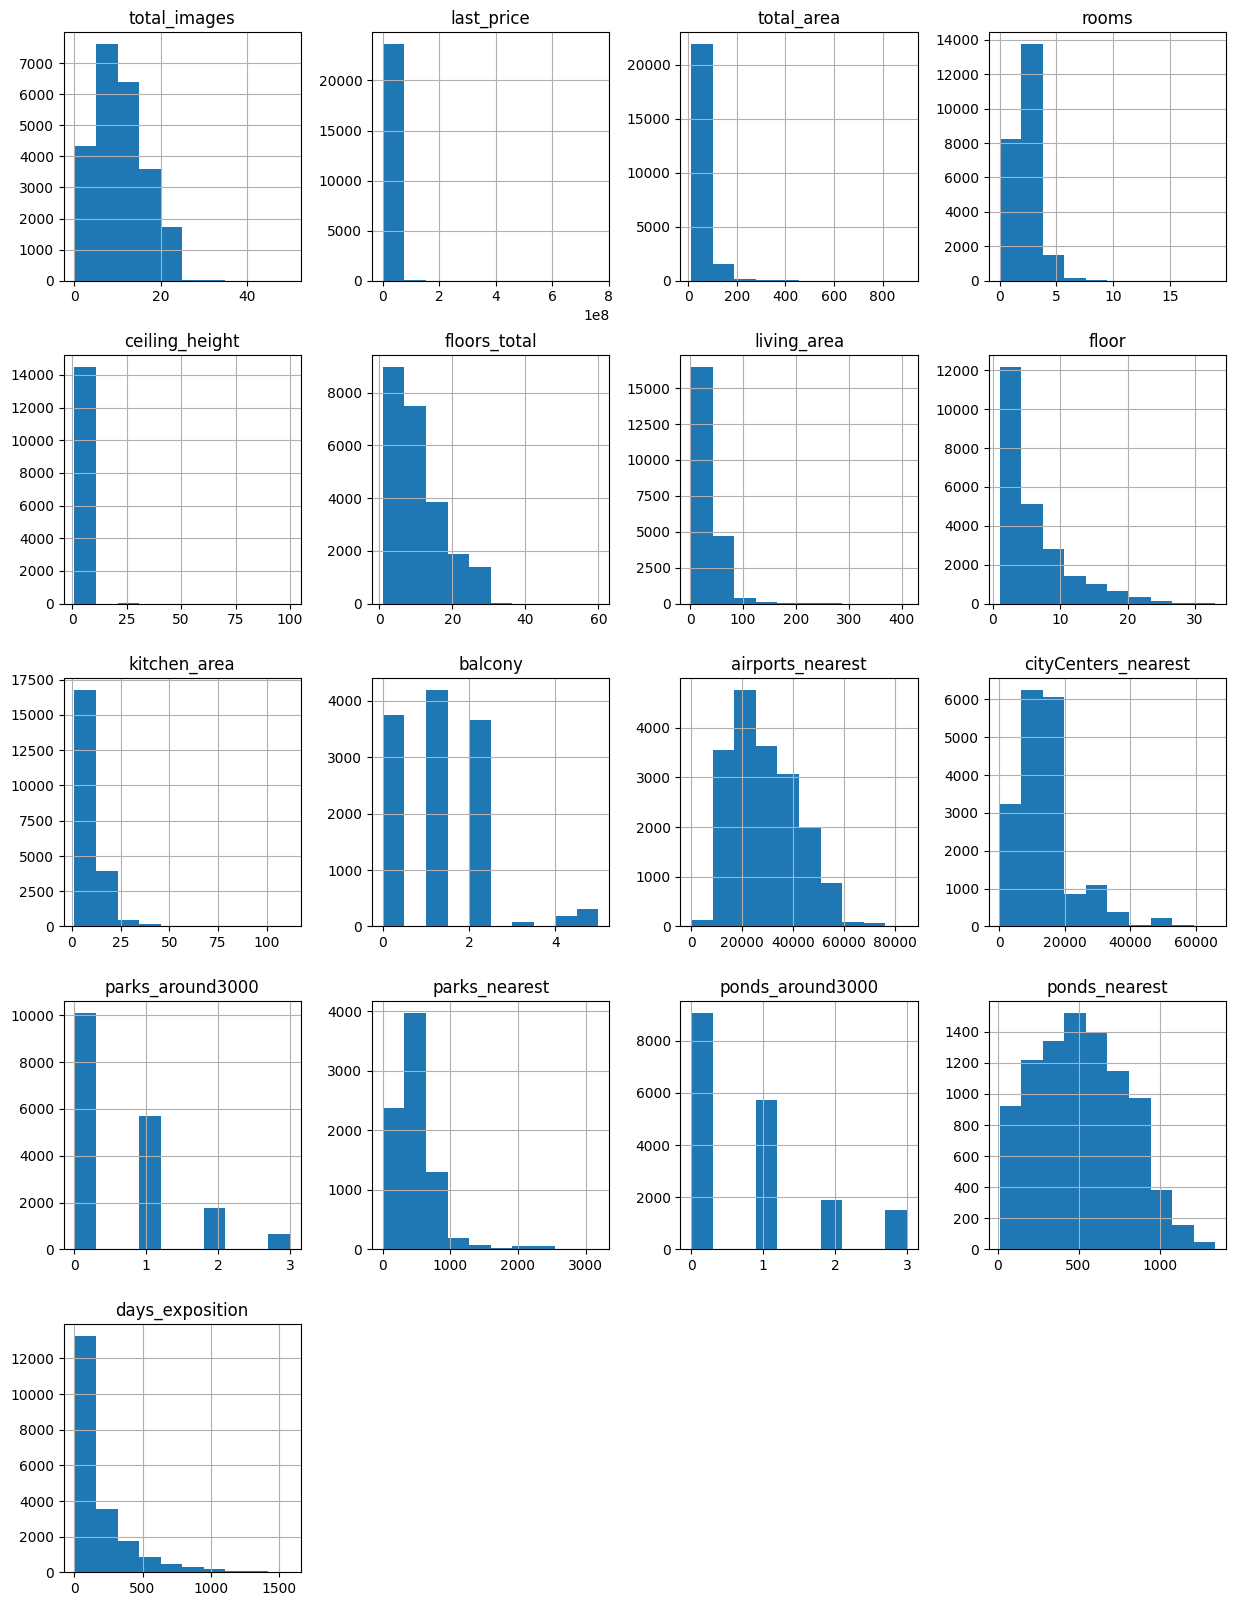

In [6]:
data.hist(figsize=(15, 20))
plt.show()

По гистограммам пока сложно сказать что-то конкретное, поэтому переходим к предобработке)

### Предобработка данных

Первым делом проверим количество пропусков для каждого столбца

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [16]:
na = data.isna().sum()
na_perc = round(data.isna().mean()*100,2)
display(pd.DataFrame({'Количество пропусков':na,'% пропусков':na_perc})
                      .sort_values(by='% пропусков')
                      .style.format('{:.2f}')
                      .background_gradient('coolwarm'))

,Количество пропусков,% пропусков
total_images,0.00,0.00
open_plan,0.00,0.00
floor,0.00,0.00
rooms,0.00,0.00
studio,0.00,0.00
total_area,0.00,0.00
last_price,0.00,0.00
first_day_exposition,0.00,0.00
locality_name,49.00,0.21
floors_total,86.00,0.36


<div class="alert alert-info"> <b>Комментарии студента:</b> Добавил строку чтобы вывести процент. Только не понимаю как округлить до целых.</div>

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- floors_total — всего этажей в доме
- kitchen_area — площадь кухни в квадратных метрах (м²)
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_nearest — расстояние до ближайшего водоёма (м)
-
+ balcony — число балконов
+ is_apartment — апартаменты (булев тип)
+ parks_around3000 — число парков в радиусе 3 км
+ ponds_around3000 — число водоёмов в радиусе 3 км

Из 22 столбцов пропуски есть в 14. При этом не во всех столбцах пропуски можно как-то обработать. Логичным кажется что в последних черех столбцах(из списка выше) мы сможем это сделать. Так как наличие пропуска может говорить об отсутствии балкона, отсутствии парка или водоема в радиусе 3 км. А в столбце Апартаменты пропуск может говорить что это как раз не апартаменты, то есть в нашем случае False.

Причины наличия пропусков могуть случайными и не случайными. К первым можно отнести пропуски по ошибке, то есть тот кто собирал данные что-то не указал, либо мог указать не верно. Так же к ним можно отнести различные ошибки при чтении или записи файла. Не случайные ошибки могут появляться по разным причинам. Например ошибки при формировании выгрузки или файла. То есть какой-то из показателей подтягвается не в нужном формате, либо формат не распознан.

In [17]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)

С помощью метода fillna() заменяем пустые значения на 0 или False в зависимости от столбца. А затем еще раз проверям наличие пустых значений методом isna().


In [18]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [20]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Кроме этого выведем еще раз первые 20 строк для проверки все ли верно сработало. В результате видим что явных ошибк нет все работало корректно. А значит можно пойти дальше.

В результате у нас остается вот такой список строк с пропусками:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- floors_total — всего этажей в доме
- locality_name — название населённого пункта
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_nearest — расстояние до ближайшего водоёма (м)
-
- ceiling_height — высота потолков (м)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- living_area — жилая площадь в квадратных метрах (м²)


В последних двух столбцах заменим пропуски на медианное значение по количеству комнат. А вот столбец с Высотой потолков трогать не будем. Так как пропусков в столбце практически 40%, при замене на медианную это может сказаться на результате исследования.



In [21]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()


In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

При попытке убрать пустые значения в столбце kitchen_area столкнулся с ошибкой. Не все значения NaN успешно заменялись на медианное значение. После чего проверил в какой из групп по кличеству комант есть только значения NaN и обнаружил что есть группа с количеством комнат 0 именно в этой группе есть 197 строк, в каждой не указана площадь кухни. Для того чтобы нам заменить пустые значения в данном столбце нужно скорректировать наш цикл. Менять значения в группе строк с 0 количеством комнат не буду, так как ни одного значения по площади кухни в них нет, а заменять на пустую строку нам не подойдет, так как нужен будет тип флоат для расчетов в дальнейшем. Так же не подойдет и змена на нулевое значение потому будет влиять на общий результат.


In [23]:
for t in data['rooms'].unique():
    if t > 0:
        data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
        data.loc[(data['rooms'] == t), 'kitchen_area'].median()

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Псле проверки пропусков видим что наш код сработал так как осталось всего 197 строк с пропусками в столбце площадь кухни, а это как раз группа с нулевым значением в количестве комнат.
И для проверки типов данных еще раз вызовем метод info()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23502 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

По типу данных есть только одна строка которую нужно скорректировать и это день размещения объявления - first_day_exposition
Применим метод to_datetime() для получения желаемого формата. Корректировка типа в данном столбце нужна для того чтобы в дальнейшем мы смогла получить день и месяц размещения объявления. Это будет проще сделать после преборазования в тип дата-время, чем использовать тип строка.

In [25]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [26]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,45.00,9,False,...,9.50,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,30.50,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23502 non-null  float64       
 13  balcony         

In [28]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [29]:
data['locality_name'].sort_values().nunique()

364

In [32]:
duplicates = ['деревня Кудрово','поселок Любань','село Никольское','городской поселок Большая Ижора','городской поселок Янино-1',
              'поселок городского типа Лесогорский','городской посёлок Мга','поселок городского типа Назия',
              'поселок городского типа Советский','деревня Фёдоровское','поселок Гарболово','поселок Зимитицы',
              'поселок Калитино','поселок Рабитицы','посёлок Щеглово','поселок Лесное','поселок Аннино','поселок Бугры',
              'поселок Возрождение','поселок Гаврилово','поселок Громово','поселок Жилгородок','поселок Ильичёво',
              'поселок Кобралово','поселок Коробицыно','поселок Лисий Нос','поселок Мельниково','поселок Мичуринское',
              'поселок Новый Свет','поселок Пансионат Зелёный Бор','поселок Перово','поселок Петровское','поселок Победа',
              'поселок Поляны','поселок Старая Малукса','поселок Стеклянный','поселок Сумино','поселок Тельмана','поселок Терволово',
              'поселок Усть-Луга','поселок городского типа Вырица','поселок городского типа Красный Бор',
              'поселок городского типа Кузьмоловский','поселок городского типа Лебяжье','садовое товарищество Приладожский',
              'садовое товарищество Рахья','поселок городского типа Токсово','поселок городского типа Форносово',
              'поселок городского типа имени Свердлова','поселок станции Вещево','поселок станции Приветнинское']
original = ['Кудрово','Любань','Никольское','поселок городского типа Большая Ижора','городской посёлок Янино-1',
            'городской посёлок Лесогорский','посёлок городского типа Мга','городской посёлок Назия','городской посёлок Советский',
            'городской посёлок Фёдоровское','деревня Гарболово','деревня Зимитицы','деревня Калитино','деревня Рабитицы',
            'деревня Щеглово','коттеджный посёлок Лесное','посёлок Аннино','посёлок Бугры','посёлок Возрождение','посёлок Гаврилово',
            'посёлок станции Громово','посёлок Жилгородок','посёлок Ильичёво','посёлок Кобралово','посёлок Коробицыно',
            'посёлок Лисий Нос','посёлок Мельниково','посёлок Мичуринское','посёлок Новый Свет','посёлок Пансионат Зелёный Бор',
            'посёлок Перово','посёлок Петровское','посёлок Победа','посёлок Поляны','посёлок Старая Малукса','посёлок Стеклянный',
            'посёлок Сумино','посёлок Тельмана','посёлок Терволово','посёлок Усть-Луга','посёлок городского типа Вырица',
            'посёлок городского типа Красный Бор','посёлок городского типа Кузьмоловский','посёлок городского типа Лебяжье',
            'поселок городского типа Приладожский','поселок городского типа Рахья','посёлок городского типа Токсово',
            'посёлок городского типа Форносово','посёлок городского типа имени Свердлова',
            'посёлок при железнодорожной станции Вещево','посёлок при железнодорожной станции Приветнинское']
data['locality_name'] = data['locality_name'].replace(duplicates, original)

duplicatesm = ['поселок Мурино','посёлок Мурино']
originalm = 'Мурино'
duplicatesp = ['городской посёлок Павлово','село Павлово']
originalp = 'посёлок городского типа Павлово'
duplicatesr = ['городской посёлок Рощино','поселок городского типа Рощино']
originalr = 'посёлок городского типа Рощино'
duplicatesa = ['поселок городского типа Рябово','поселок Рябово',]
originala = 'посёлок городского типа Рябово'
data['locality_name'] = data['locality_name'].replace(duplicatesm, originalm)
data['locality_name'] = data['locality_name'].replace(duplicatesp, duplicatesp)
data['locality_name'] = data['locality_name'].replace(duplicatesr, originalr)
data['locality_name'] = data['locality_name'].replace(duplicatesa, originala)

Для проверки наличия дубликатов мы воспользовались методами unique() для вывода уникальных значений в столбце. После чего проводим замену повторяющихся значений.


In [33]:
data['locality_name'].sort_values().nunique()

307

In [34]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Свирьстрой', 'городской посёлок Советский',
       'городской посёлок Фёдоровское', 'городской посёлок Янино-1',
       'деревня Агалатово', 'деревня Аро', 'деревня Бат

Методом duplicated() проверяем наличие явных дубликатов

In [35]:
data.duplicated().sum()

0

Делаем вывод что явных дубликатов нет.

In [36]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

После вывода названия столбцов видим что стоит переименовать тоькоодин столбец и это 'cityCenters_nearest'. Для этого воспользуемся методом rename()

In [37]:
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'})

In [38]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

После проверки видим что замена успешна, можно двигаться дальше.
Для того чтобы не перебирать все столбцы по уникальным занчениям, еще раз воспользумеся гистограммой и посмотрим какие из столбцов стоит проверить


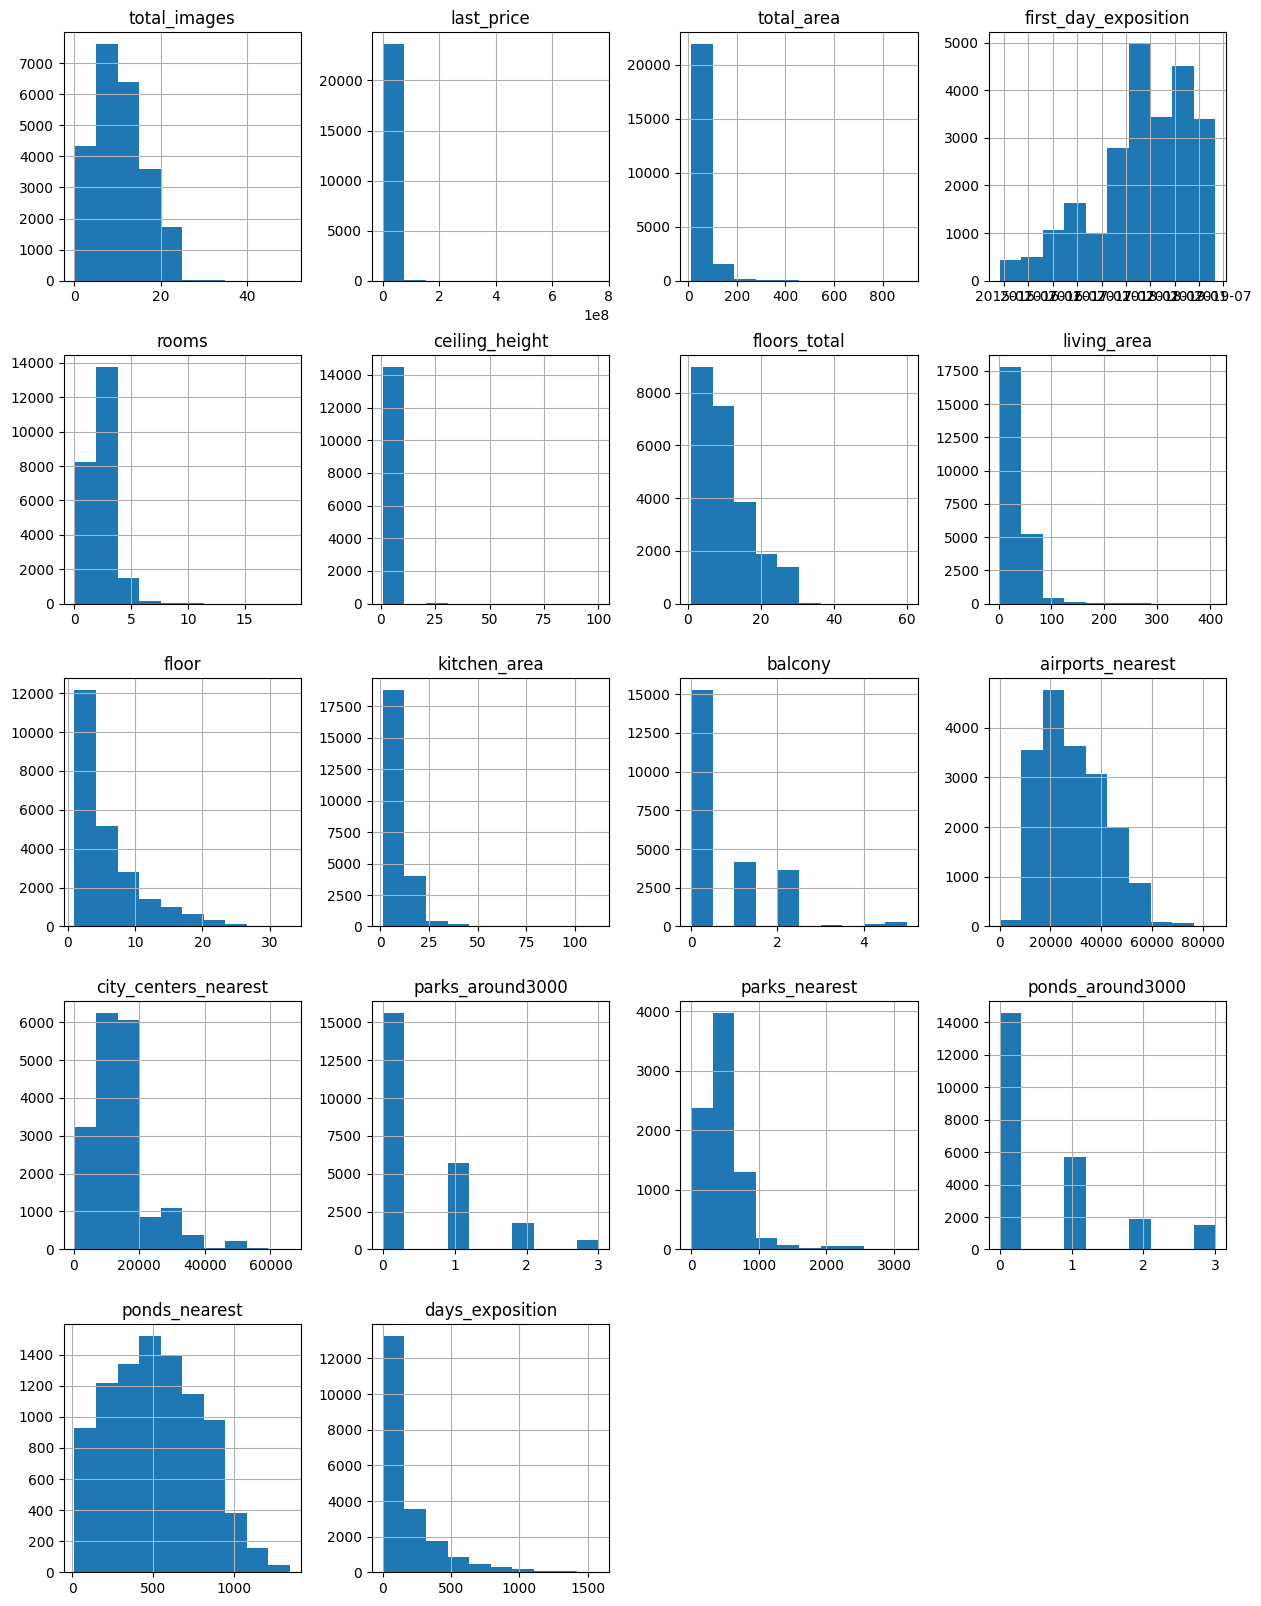

In [39]:
data.hist(figsize=(15, 20))
plt.show()

После изучения полученных гистограмм стоит проверить следующие столбцы
- last_price
- total_area
- ceiling_height
- balcony

In [40]:
data['last_price'].unique()

array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

In [41]:
data['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

In [42]:
data['balcony'].sort_values().unique()

array([0., 1., 2., 3., 4., 5.])

Па данным трем столбцам не вижу каких-то аномальных значений. Единственный момент это наличие 4 и 5 балконов, при это такие квартиры действительно могут быть, хотя очень редко встречаются. А так же квартиры с 12 квадратами и 900 квадратов. Так же очень редкие значения, но тоже встречаются. Поэтому корректировку данных столбцов проводить не будем.

In [43]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

После получения уникальных данных по столбцу 'ceiling_height' видим что есть очень маленькие значени от 1 до 2 метров и слишком большие более 10. Есть подозрение что во всех значениях что больше 10 не верно указан разделитель, поэтому попробуем исправить данные значения.

In [44]:
for t in data['ceiling_height'].unique():
    data.loc[(data['ceiling_height'] == t) & (data['ceiling_height']>=10)] = \
    data.loc[(data['ceiling_height'] == t/10)]

In [45]:
data['ceiling_height'].sort_values().unique()

array([1.  , 1.2 , 1.75, 2.  , 2.2 , 2.25, 2.3 , 2.34, 2.4 , 2.45, 2.46,
       2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57,
       2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68,
       2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79,
       2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 ,
       2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01,
       3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12,
       3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24,
       3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35,
       3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47,
       3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58,
       3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75,
       3.76, 3.78, 3.8 , 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 ,
       3.93, 3.95, 3.98, 4.  , 4.06, 4.1 , 4.14, 4.

После того как мы скорректировали знчения более 10 метров, данные приобрели нужный нам вид. Но остаются аномально низкие значения от 1 до 2,0 метров. Поэтому уберем эти значения из списка, по сути просто перезапишем нашу таблицу.


In [47]:
data = data.loc[data['ceiling_height'] >= 2]

Изначально использовал query(), потому что так удобнее было получить нужный набор данных, но при создании нового столбца на 3 шаге, получал предупреждение 'SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame. Try using .loc[row_indexer,col_indexer] = value instead'

Поэтому скорректировал запрос с ипользованием loc.

In [48]:
data['ceiling_height'].sort_values().unique()

array([2.  , 2.2 , 2.25, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48, 2.49,
       2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 ,
       2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71,
       2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82,
       2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93,
       2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04,
       3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15,
       3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27,
       3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38,
       3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ,
       3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62,
       3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 ,
       3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95, 3.98,
       4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.2 , 4.

Теперь данные готовы к дальнейшем анализу.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим столбец цена одного квадратного метра, для этого разделим значение цены на площадь квартиры. Плюс для удобства отображения округлим полученные значение до десятых используя метод round(). Инфу по методу взял вот тут https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html

In [49]:
data['price_one_metre'] = (data['last_price']/data['total_area']).round(1)

Проверим что получилось

In [50]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metre
0,20.0,13000000.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8.0,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4
4,2.0,10000000.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13.0,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0
9,18.0,5400000.0,61.0,2017-02-26,3.0,2.50,9.0,43.6,7.0,False,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.6
10,5.0,5050000.0,39.6,2017-11-16,1.0,2.67,12.0,20.3,3.0,False,...,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.3
13,20.0,3550000.0,42.8,2017-07-01,2.0,2.56,5.0,27.0,5.0,False,...,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82943.9
16,11.0,6700000.0,82.0,2017-11-23,3.0,3.05,5.0,55.6,1.0,False,...,0.0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,81707.3
18,8.0,3250000.0,31.0,2017-01-27,1.0,2.50,5.0,19.4,2.0,False,...,1.0,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168.0,104838.7
19,16.0,14200000.0,121.0,2019-01-09,3.0,2.75,16.0,76.0,8.0,False,...,0.0,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0,117355.4
20,12.0,6120000.0,80.0,2017-09-28,3.0,2.70,27.0,48.0,11.0,False,...,2.0,посёлок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74.0,76500.0
22,20.0,5000000.0,58.0,2017-04-24,2.0,2.75,25.0,30.0,15.0,False,...,2.0,Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,60.0,86206.9


In [52]:
data['day_public'] = data['first_day_exposition'].dt.dayofweek
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metre,day_public
0,20.0,13000000.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8.0,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,3
4,2.0,10000000.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13.0,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1
9,18.0,5400000.0,61.0,2017-02-26,3.0,2.50,9.0,43.6,7.0,False,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.6,6
10,5.0,5050000.0,39.6,2017-11-16,1.0,2.67,12.0,20.3,3.0,False,...,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.3,3
13,20.0,3550000.0,42.8,2017-07-01,2.0,2.56,5.0,27.0,5.0,False,...,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82943.9,5
16,11.0,6700000.0,82.0,2017-11-23,3.0,3.05,5.0,55.6,1.0,False,...,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,81707.3,3
18,8.0,3250000.0,31.0,2017-01-27,1.0,2.50,5.0,19.4,2.0,False,...,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168.0,104838.7,4
19,16.0,14200000.0,121.0,2019-01-09,3.0,2.75,16.0,76.0,8.0,False,...,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0,117355.4,2
20,12.0,6120000.0,80.0,2017-09-28,3.0,2.70,27.0,48.0,11.0,False,...,посёлок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74.0,76500.0,3
22,20.0,5000000.0,58.0,2017-04-24,2.0,2.75,25.0,30.0,15.0,False,...,Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,60.0,86206.9,0


Использовал вот эту ссылку https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.weekday.html

In [54]:
data['month_public'] = data['first_day_exposition'].dt.month
data['year_public'] = data['first_day_exposition'].dt.year
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metre,day_public,month_public,year_public
0,20.0,13000000.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8.0,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,3,3,2019
4,2.0,10000000.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13.0,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018
9,18.0,5400000.0,61.0,2017-02-26,3.0,2.50,9.0,43.6,7.0,False,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524.6,6,2,2017
10,5.0,5050000.0,39.6,2017-11-16,1.0,2.67,12.0,20.3,3.0,False,...,13878.0,1.0,310.0,2.0,553.0,137.0,127525.3,3,11,2017
13,20.0,3550000.0,42.8,2017-07-01,2.0,2.56,5.0,27.0,5.0,False,...,33058.0,1.0,294.0,3.0,298.0,366.0,82943.9,5,7,2017
16,11.0,6700000.0,82.0,2017-11-23,3.0,3.05,5.0,55.6,1.0,False,...,10698.0,3.0,420.0,0.0,NaN,397.0,81707.3,3,11,2017
18,8.0,3250000.0,31.0,2017-01-27,1.0,2.50,5.0,19.4,2.0,False,...,10842.0,1.0,759.0,0.0,NaN,168.0,104838.7,4,1,2017
19,16.0,14200000.0,121.0,2019-01-09,3.0,2.75,16.0,76.0,8.0,False,...,12843.0,0.0,NaN,0.0,NaN,97.0,117355.4,2,1,2019
20,12.0,6120000.0,80.0,2017-09-28,3.0,2.70,27.0,48.0,11.0,False,...,19311.0,0.0,NaN,0.0,NaN,74.0,76500.0,3,9,2017
22,20.0,5000000.0,58.0,2017-04-24,2.0,2.75,25.0,30.0,15.0,False,...,NaN,0.0,NaN,0.0,NaN,60.0,86206.9,0,4,2017


Так же использовал вот эти ссылки
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.month.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.year.html

In [55]:
data['floor_type'] = data['floors_total'] - data['floor']
data.loc[data['floor'] == 1, 'floor_type'] = -1
def type_of_floor(floor):
    try:
        if floor == -1:
            return 'первый'
        elif floor == 0:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

data['floor_type'] = data['floor_type'].apply(type_of_floor)
data.loc[1!=data['floor']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metre,day_public,month_public,year_public,floor_type
0,20.0,13000000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,False,...,1.0,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой
4,2.0,10000000.0,100.00,2018-06-19,2.0,3.03,14.0,32.0,13.0,False,...,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой
9,18.0,5400000.0,61.00,2017-02-26,3.0,2.50,9.0,43.6,7.0,False,...,0.0,NaN,0.0,NaN,289.0,88524.6,6,2,2017,другой
10,5.0,5050000.0,39.60,2017-11-16,1.0,2.67,12.0,20.3,3.0,False,...,1.0,310.0,2.0,553.0,137.0,127525.3,3,11,2017,другой
13,20.0,3550000.0,42.80,2017-07-01,2.0,2.56,5.0,27.0,5.0,False,...,1.0,294.0,3.0,298.0,366.0,82943.9,5,7,2017,последний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13.0,3550000.0,35.30,2018-02-28,1.0,2.86,15.0,16.3,4.0,False,...,1.0,353.0,2.0,652.0,29.0,100566.6,2,2,2018,другой
23691,11.0,9470000.0,72.90,2016-10-13,2.0,2.75,25.0,40.3,7.0,False,...,0.0,NaN,1.0,806.0,519.0,129904.0,3,10,2016,другой
23693,9.0,4600000.0,62.40,2016-08-05,3.0,2.60,9.0,40.0,8.0,False,...,1.0,352.0,1.0,675.0,239.0,73717.9,4,8,2016,другой
23694,9.0,9700000.0,133.81,2017-03-21,3.0,3.70,5.0,73.3,3.0,False,...,1.0,796.0,3.0,381.0,NaN,72490.8,1,3,2017,другой


Для добавления столбца с типом этажа проделали следующие действия:
- Создали столбей и в него положиди разницу между "Всего этажей" и "Этаж", то есть мы получили ноль если это последний этаж;
- В новом столбце прописали -1 во всех строках где Этаж первый. Взял минус один, так как если этаж пред послежний при вычитании получается 1 но это не первый этаж. А так у нас есть в столбце последний этаж - 0 и первый - -1;
- После чего проходим по новому столбцу с помощью функции и заменяем значения -1 на "первый", 0 на "последний",а все остальное на "другой"

После чего проверяем и видим что все сработало.

In [57]:
data['city_centres_near_km'] = (data['city_centers_nearest']/1000).round(0)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metre,day_public,month_public,year_public,floor_type,city_centres_near_km
0,20.0,13000000.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8.0,False,...,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой,16.0
4,2.0,10000000.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13.0,False,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
9,18.0,5400000.0,61.0,2017-02-26,3.0,2.50,9.0,43.6,7.0,False,...,NaN,0.0,NaN,289.0,88524.6,6,2,2017,другой,15.0
10,5.0,5050000.0,39.6,2017-11-16,1.0,2.67,12.0,20.3,3.0,False,...,310.0,2.0,553.0,137.0,127525.3,3,11,2017,другой,14.0
13,20.0,3550000.0,42.8,2017-07-01,2.0,2.56,5.0,27.0,5.0,False,...,294.0,3.0,298.0,366.0,82943.9,5,7,2017,последний,33.0
16,11.0,6700000.0,82.0,2017-11-23,3.0,3.05,5.0,55.6,1.0,False,...,420.0,0.0,NaN,397.0,81707.3,3,11,2017,первый,11.0
18,8.0,3250000.0,31.0,2017-01-27,1.0,2.50,5.0,19.4,2.0,False,...,759.0,0.0,NaN,168.0,104838.7,4,1,2017,другой,11.0
19,16.0,14200000.0,121.0,2019-01-09,3.0,2.75,16.0,76.0,8.0,False,...,NaN,0.0,NaN,97.0,117355.4,2,1,2019,другой,13.0
20,12.0,6120000.0,80.0,2017-09-28,3.0,2.70,27.0,48.0,11.0,False,...,NaN,0.0,NaN,74.0,76500.0,3,9,2017,другой,19.0
22,20.0,5000000.0,58.0,2017-04-24,2.0,2.75,25.0,30.0,15.0,False,...,NaN,0.0,NaN,60.0,86206.9,0,4,2017,другой,NaN


Для создания последнего столбца "Расстояние до центра в км" делим столбец "Растояние до центра" на 1000 и округляем до целых значений с помощью метода round(). Инфу по методу взял вот тут https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html

### Проведите исследовательский анализ данных

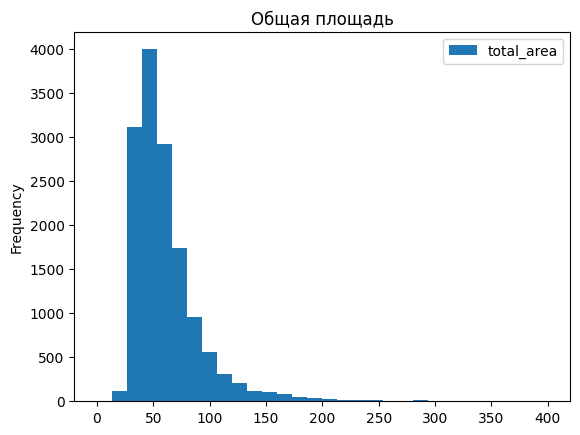

In [60]:
data.plot(kind = 'hist', y ='total_area', bins = 30, title = 'Общая площадь', range = (0, 400));

В целом гистограмма напоминает распределение Пуассона, что говорит о том что с данными все в порядке. Большая часть квартир с площадью в районе 50 квадратов. А вот за 250 квадратов практически нет таких квартир.

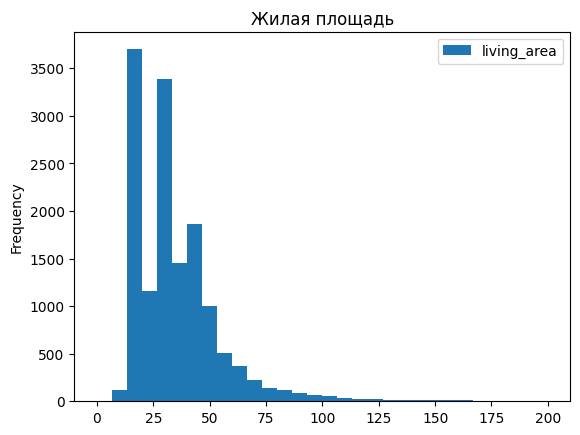

In [61]:
data.plot(kind = 'hist', y ='living_area', bins = 30, title = 'Жилая площадь', range = (0, 200));

А вот по жилой площади картина другая, есть два пика 17 и 30 что говорит о большем количества квартир именно с такой квадратоурой.

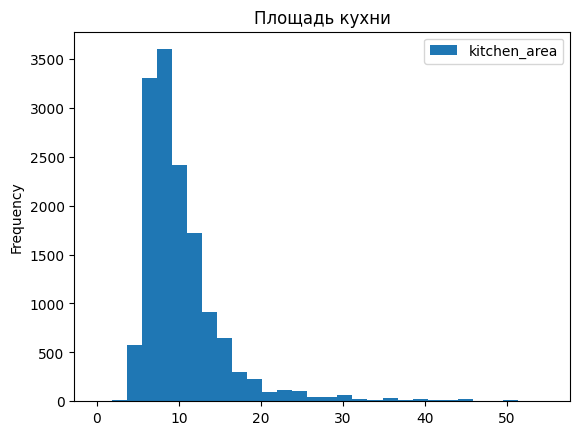

In [62]:
data.plot(kind = 'hist', y ='kitchen_area', bins = 30, title = 'Площадь кухни', range = (0, 55));

Картина аналогична гистограмме по Общей площади, только тут пик в районе 8 квадратов.

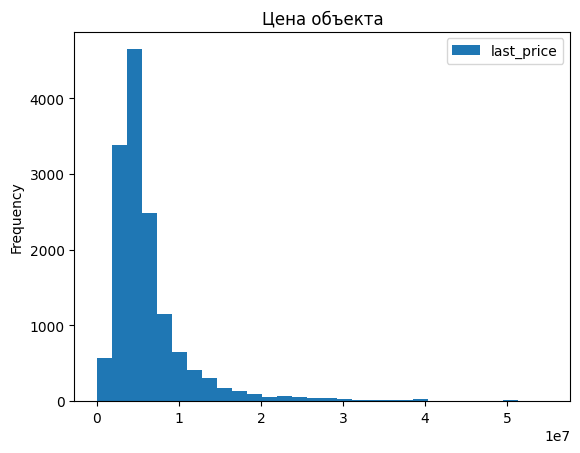

In [63]:
data.plot(kind = 'hist', y ='last_price', bins = 30, title = 'Цена объекта', range = (0, 55000000));

Гистограмма так же похожа на распрелеление Пуассона, пик приходится на цену в районе 5 млн.

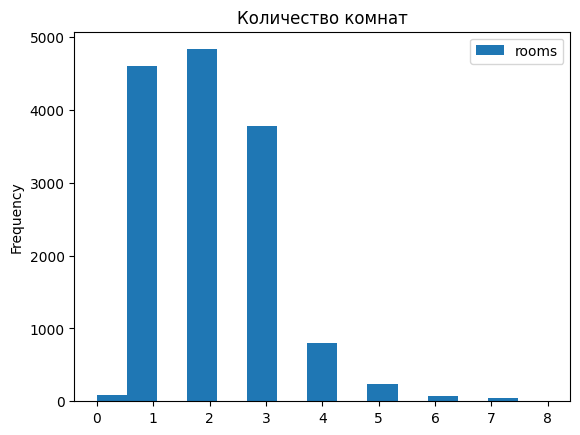

In [64]:
data.plot(kind = 'hist', y ='rooms', bins = 15, title = 'Количество комнат', range = (0, 8));

По количеству комнат преобладают квартиры от 1 до 3, что вполне логично.

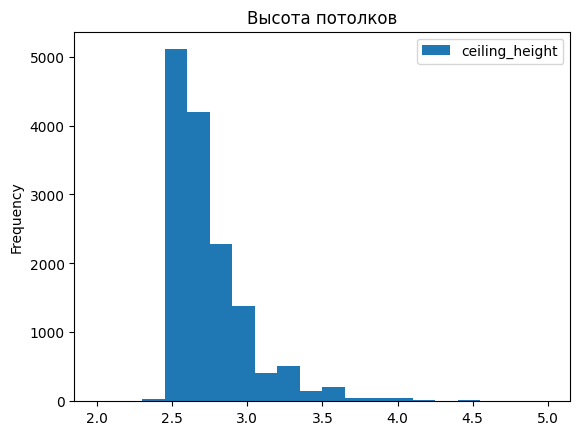

In [65]:
data.plot(kind = 'hist', y ='ceiling_height', bins = 20, title = 'Высота потолков', range = (2, 5));

Видим что пик приходится на 2,5 метра, кажется что можно было убрать значения как раз до этой высоты.

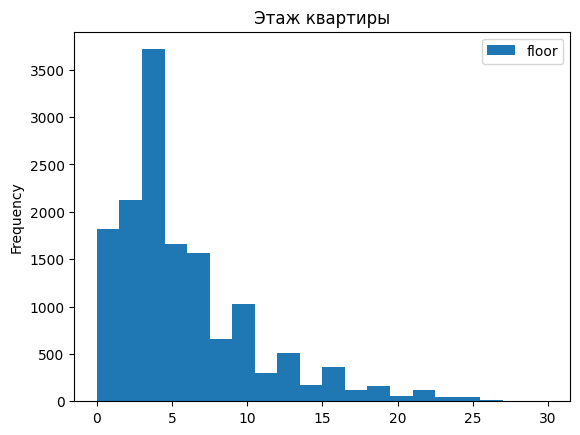

In [66]:
data.plot(kind = 'hist', y ='floor', bins = 20, title = 'Этаж квартиры', range = (0, 30));

Пиковое значение приходится на 3 этаж.

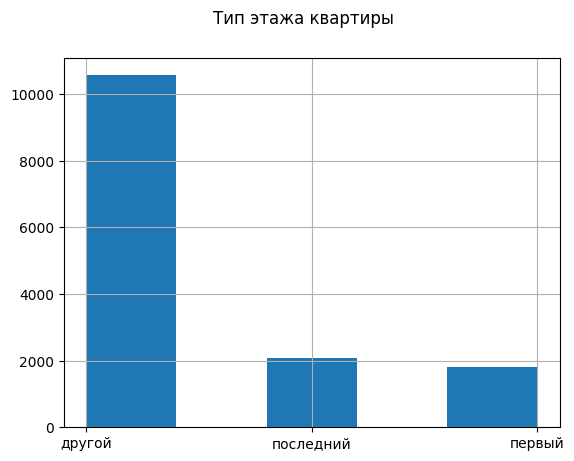

In [68]:
floor_type_grouped = data.groupby('floor_type')['total_images'].count()

data['floor_type'].hist(bins = 5)
pl.suptitle("Тип этажа квартиры");

При постороении гистограммы возникли сложности с тем что plot не смог построить график на основе столбца со строковыми значениями. Поэтому взял hist. Для добавления заголовка использовал вот эту статью https://stackoverflow.com/questions/19614400/add-title-to-collection-of-pandas-hist-plots

На основании полученной гистограммы можно сделать вывод, что первый и последний этажи встречались одинаково часто. Хотя наболее частым был тип "другой". Что вполне логично.

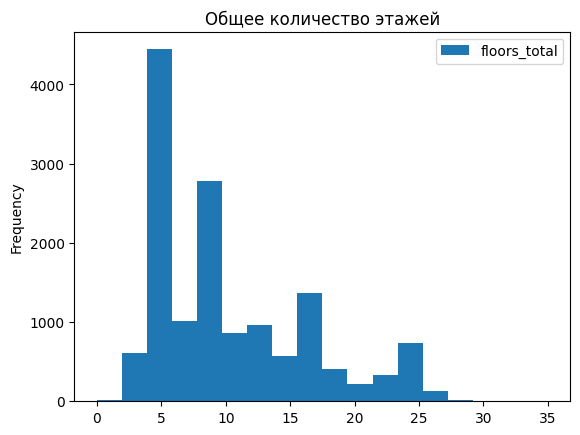

In [69]:
data.plot(kind = 'hist', y ='floors_total', bins = 18, title = 'Общее количество этажей', range = (0, 35));

Наиболее часто встречаются пяти и девяти этажные дома

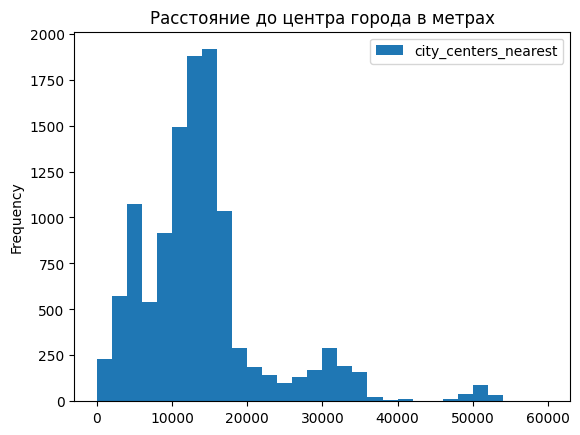

In [70]:
data.plot(kind = 'hist', y ='city_centers_nearest',
          bins = 30, title = 'Расстояние до центра города в метрах', range = (0, 60000));

Наиболшее количество квартир находится на растоянии от 12000 м до 18000 м от центра города.

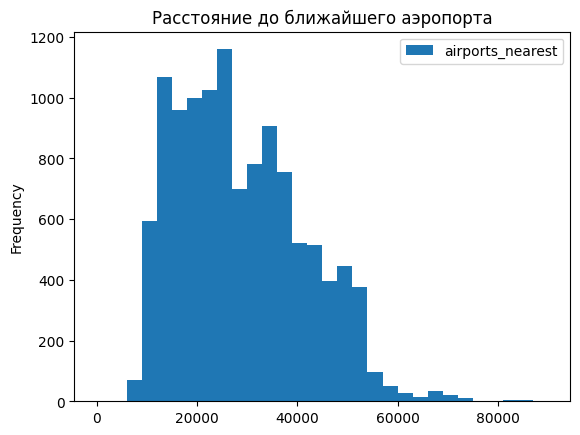

In [71]:
data.plot(kind = 'hist', y ='airports_nearest', bins = 30, title = 'Расстояние до ближайшего аэропорта', range = (0, 90000));

Наиболее количество квартир находится на растоянии 25000 м от аэропорта.

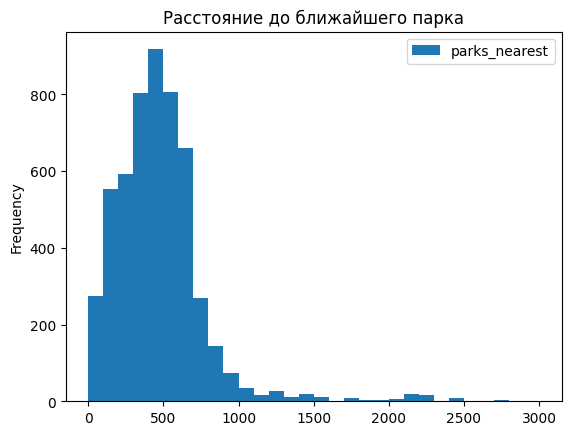

In [72]:
data.plot(kind = 'hist', y ='parks_nearest', bins = 30, title = 'Расстояние до ближайшего парка', range = (0, 3000));

А вот ближайший парк для большинства квартир находится в районе 500 метров.

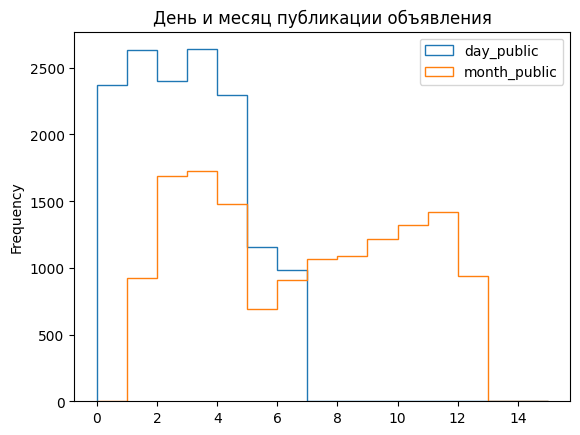

In [74]:
ax = data.plot(
    kind = 'hist',
    y ='day_public',
    bins = 15,
    title = 'День и месяц публикации объявления',
    range = (0, 15),
    histtype = 'step',
)
data.plot(
    kind = 'hist',
    y ='month_public',
    bins = 15,
    title = 'День и месяц публикации объявления',
    range = (0, 15),
    ax = ax,
    histtype = 'step',
);

Что каксается дня публикации объявления, большая чать квартир была размещена с 1 по 5 число месяца. Пиковые месяца это Март, Апрель и Май.

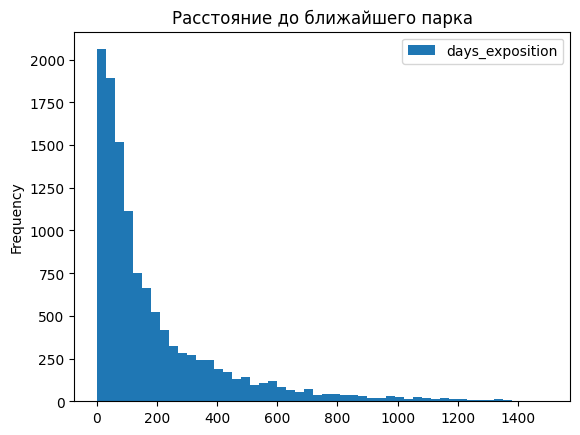

In [75]:
data.plot(kind = 'hist', y ='days_exposition', bins = 50, title = 'Расстояние до ближайшего парка', range = (0, 1500));

In [76]:
data['days_exposition'].describe()

count    12029.000000
mean       190.521407
std        228.809347
min          1.000000
25%         45.000000
50%        103.000000
75%        248.000000
max       1580.000000
Name: days_exposition, dtype: float64

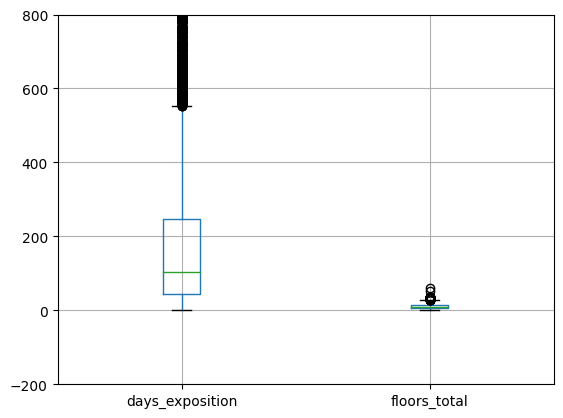

In [77]:
data_new = data[['days_exposition', 'floors_total']]
plt.ylim(-200, 800)
data_new.boxplot();

После расчета cреднего значения и медианы видим что среднее составило 180 дней, а медиана 95 дня. Что в целом подтвеждается и гистограммой, так как большая часть объявлений была размещена в течении 200 дней. Поэтому быстрыми можно считать продажи длительностью до 100 дней, а необычно долгими все что более 1000 дней.

In [78]:
data['total_area'].corr(data['last_price'])

0.7131286071362068

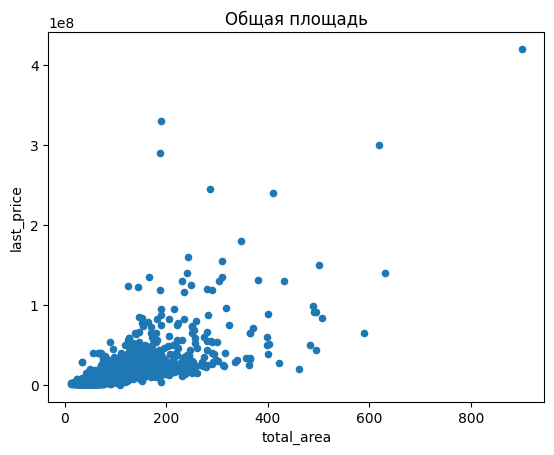

In [79]:
data.plot(x='total_area', y='last_price', kind='scatter', title = 'Общая площадь');

In [80]:
data['living_area'].corr(data['last_price'])

0.60372341490576

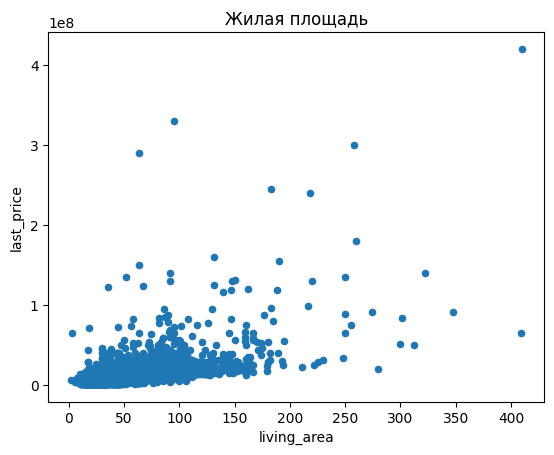

In [81]:
data.plot(x='living_area', y='last_price', kind='scatter', title = 'Жилая площадь');

In [82]:
data['kitchen_area'].corr(data['last_price'])

0.5205428897783517

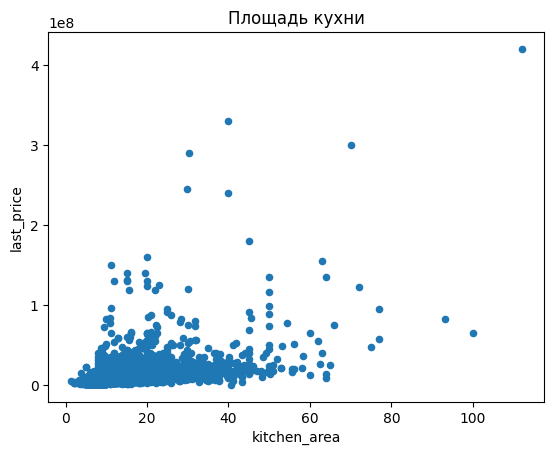

In [83]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', title = 'Площадь кухни');

In [84]:
data['rooms'].corr(data['last_price'])

0.40173330228300497

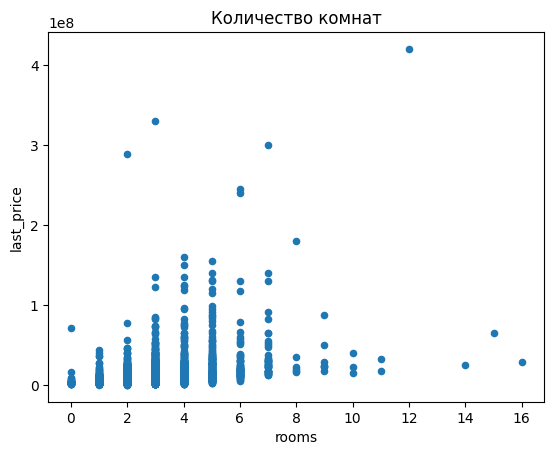

In [85]:
data.plot(x='rooms', y='last_price', kind='scatter', title = 'Количество комнат');

In [86]:
data['floor'].corr(data['last_price'])

0.037589690414619334

Так как по столбцу с типом этажа не удается рассчитать корреляцию, так как значения в столбце строковые, взял для расчета этаж.

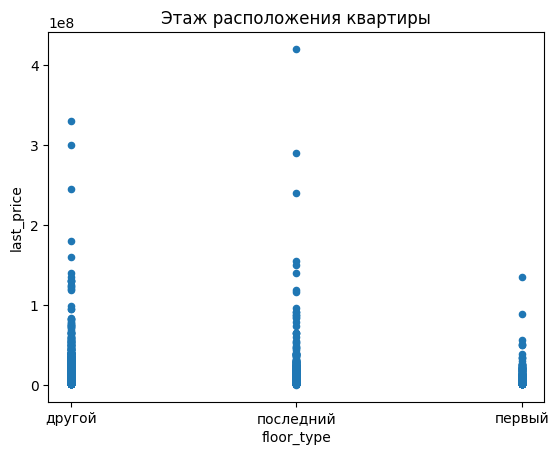

In [87]:
data.plot(x='floor_type', y='last_price', kind='scatter', title = 'Этаж расположения квартиры');

In [88]:
data['day_public'].corr(data['last_price'])

-0.015780483372323427

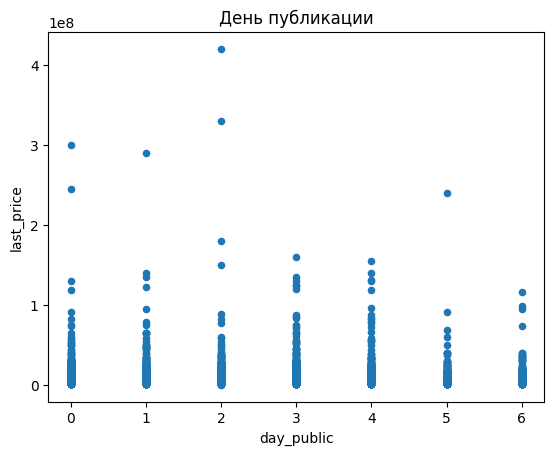

In [89]:
data.plot(x='day_public', y='last_price', kind='scatter', title = 'День публикации');

In [90]:
data['month_public'].corr(data['last_price'])

0.004646774593967289

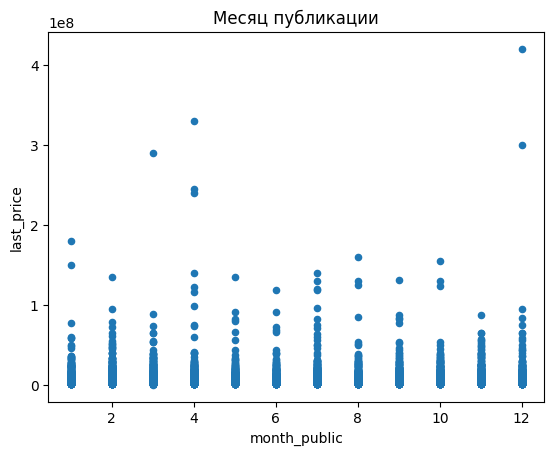

In [91]:
data.plot(x='month_public', y='last_price', kind='scatter', title = 'Месяц публикации');

In [92]:
data['year_public'].corr(data['last_price'])

-0.05553324519620692

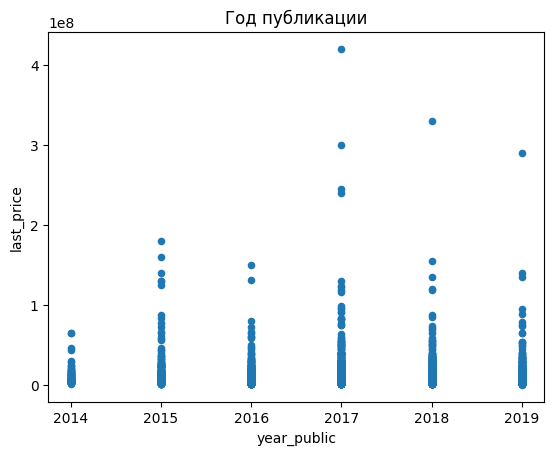

In [93]:
data.plot(x='year_public', y='last_price', kind='scatter', title = 'Год публикации');

В результате расчета корреляции и построения матрицы рассеивания получили следующий результат.
Наибольшая корреляция(значение блиско к 1) а занчит и наибольшая зависимость наблюдавется мажду стоимостью жилья и общей площадью квартиры. С каждым последующим показателем величина корреляции снижается, но зависимость так же присутствует.А это показатели:
- Жилая площадь;
- Площадь кухни;
- Количество комнат;
- Этаж.

В остальных показателях зависимость близка к нулю, а следовательно зависимости практически нетот дня недели, месяца и года публикации объявления.

In [94]:
ave_price = data.pivot_table(index = 'locality_name', values = 'price_one_metre', aggfunc = ['count', 'mean']).round(2)
ave_price.columns = ['count', 'mean']
ave_price.sort_values(by = 'count', ascending = False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,10087,115693.28
Всеволожск,272,67344.47
Пушкин,234,103920.49
Мурино,226,87773.19
посёлок Шушары,217,79538.62
Колпино,203,75938.53
Кудрово,195,96098.41
Гатчина,148,70024.96
Петергоф,145,85554.14


С помощью метода pivot_table() а так же переименования названия столбцов и сортировки мы получили список населнных пунков, отсортированный по количеству объявлений, а так же среднюю стоимость одного метра квадрадного в этом пункте.

In [95]:
ave_price.sort_values(by = 'mean', ascending = False)

,count,mean
locality_name,,
Санкт-Петербург,10087,115693.28
Зеленогорск,19,113037.01
деревня Мистолово,3,107121.70
деревня Бор,1,105539.30
посёлок Репино,4,104238.60
...,...,...
поселок Житково,1,15648.30
деревня Фалилеево,1,13303.80
поселок городского типа Ефимовский,1,12686.60


Если в метод сотртировки передать другой столбец, а именно стоимость метра квадратного и снова отсортировать по убыванию, получим список населнных пунктов от самого дорогого до самого дешевого квадратного метра. В результат получаем что в Санкт-Петербурге стоимость метра квадратного в среднем 115693.28, а в деревне Вахнова Кара всего 11688.30

In [96]:
data['price_km'] = (data['last_price']/data['city_centres_near_km']).round(2)
data_spb = data.loc[data['locality_name'] == 'Санкт-Петербург']
data_spb.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_one_metre,day_public,month_public,year_public,floor_type,city_centres_near_km,price_km
0,20.0,13000000.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8.0,False,...,2.0,755.0,NaN,120370.4,3,3,2019,другой,16.0,812500.00
4,2.0,10000000.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13.0,False,...,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0,1250000.00
9,18.0,5400000.0,61.0,2017-02-26,3.0,2.50,9.0,43.6,7.0,False,...,0.0,NaN,289.0,88524.6,6,2,2017,другой,15.0,360000.00
10,5.0,5050000.0,39.6,2017-11-16,1.0,2.67,12.0,20.3,3.0,False,...,2.0,553.0,137.0,127525.3,3,11,2017,другой,14.0,360714.29
16,11.0,6700000.0,82.0,2017-11-23,3.0,3.05,5.0,55.6,1.0,False,...,0.0,NaN,397.0,81707.3,3,11,2017,первый,11.0,609090.91
18,8.0,3250000.0,31.0,2017-01-27,1.0,2.50,5.0,19.4,2.0,False,...,0.0,NaN,168.0,104838.7,4,1,2017,другой,11.0,295454.55
19,16.0,14200000.0,121.0,2019-01-09,3.0,2.75,16.0,76.0,8.0,False,...,0.0,NaN,97.0,117355.4,2,1,2019,другой,13.0,1092307.69
23,11.0,2950000.0,32.0,2016-10-29,1.0,2.60,9.0,17.7,9.0,False,...,1.0,190.0,615.0,92187.5,5,10,2016,последний,14.0,210714.29
25,3.0,6800000.0,76.0,2015-10-01,2.0,2.75,23.0,39.0,18.0,False,...,1.0,564.0,300.0,89473.7,3,10,2015,другой,15.0,453333.33
27,20.0,7100000.0,70.0,2017-05-12,3.0,2.60,17.0,49.0,11.0,False,...,1.0,779.0,151.0,101428.6,4,5,2017,другой,11.0,645454.55


In [97]:
data_spb['last_price'].corr(data_spb['city_centres_near_km'])

-0.2891982862269937

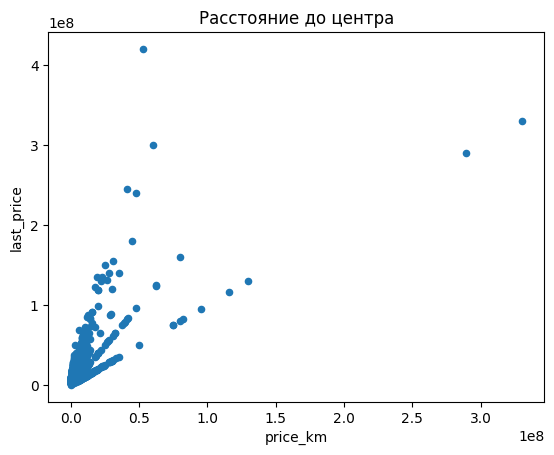

In [98]:
data_spb.plot(x='price_km', y='last_price', kind='scatter', title = 'Расстояние до центра');

Если сравнить показатели по городу Санкт-Петербургу. Видим что между расстоянием до центра и стоимостью жилья имеется небольшая отрицательная корреляция. То есть чем ближе к центру тем выше стоимость. Но зависимость не ярко выражена.

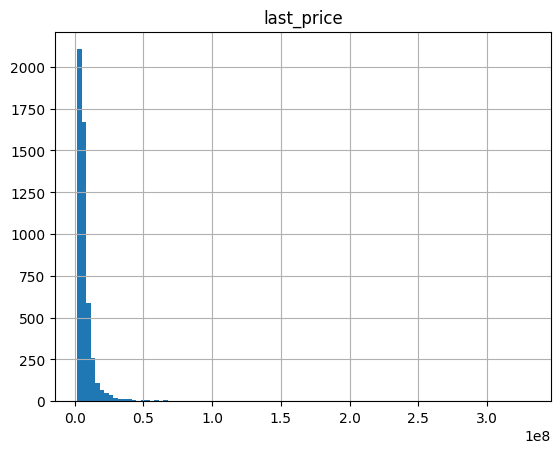

In [99]:
sum_table_spb = data_spb.pivot_table(index = 'city_centers_nearest', values = 'last_price', aggfunc = 'median')
sum_table_spb.hist(bins = 100)
plt.show()

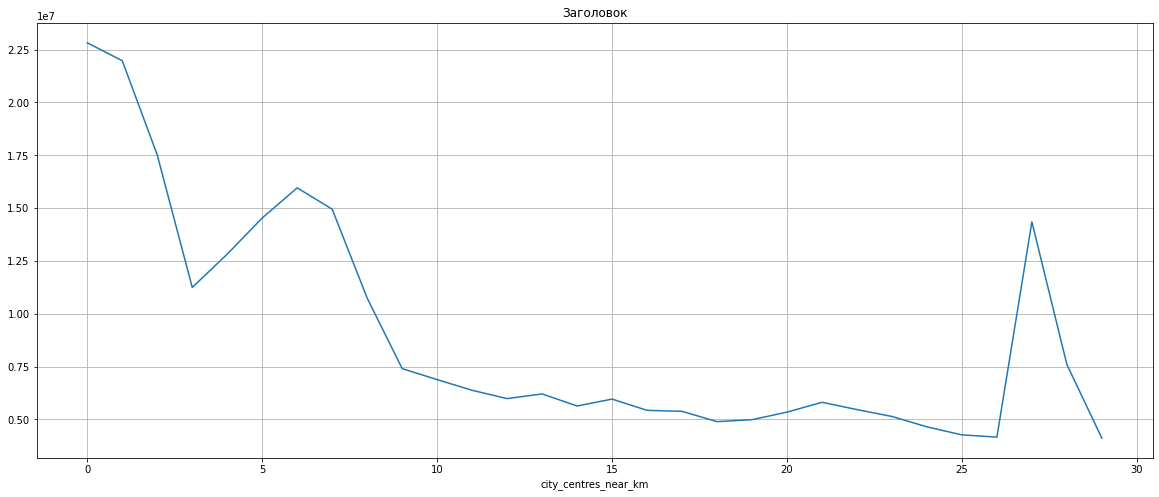

In [ ]:
data[data['locality_name'] == 'Санкт-Петербург'].groupby('city_centres_near_km')['last_price'].mean() \
    .plot(figsize = (20, 8), title = 'Заголовок', grid = True);

В ходе работы над проектом были проделаны следующие действия:

 1) Обзор и знакомство с данными - Вывели несколько строк, чтобы понять что за данные у нас имеются, а так же в каком виде они представлены. Вывели общую информацию по таблице.
    
 2) Скорректировали названия столбцов, проверили наличие явных и не явных дубликатов, часть дубликатов удалили. После чего проверили типы данных в солбцах и скорректировали тип данных для столбца со временем публикации объявления. А так же проверили и устранили аномальные значения в данных.
    
 3) Добавили необходимые нам для исследования столбцы:
    
 - цена одного квадратного метра;
 - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
 - месяц публикации объявления;
 - год публикации объявления;
 - тип этажа квартиры (значения — «первый», «последний», «другой»);
 - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

4) На основании построения гистограмм посмотрели на распределение данных по основным апарметрам. Выявили какие продажи можно сяитать быстрыми, а какие очень длительными. Определили какие факторы влияют на общую стоимость объекта. Затем посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Описали, как стоимость объектов зависит от расстояния до центра города.

### Общий вывод

Вывод: В результате проделалной работы можно сказать о том что имеется зависимость между стоимостью жилья и общей площадью квартиры. И это прямая зависимость, то есть чем больше площадь, тем выше стоимость жилья. Так же зависимость имеется от следующих факторов: жилая площадь, площадь кухни, количество комнат и этаж. Зависимость так же прямая, но уже не столь выраженная как с общей площадью. Кроме этого на стоимость жилья влияет и расположение от центра города, при чем тут зависимость обратная. То есть чем ближе к центру тем дороже жилье. А вот с днем, месяцем и годом размещения практически нет связи(а если и есть то она близка к нулю). Ктоме этого мы узнали что из полученной базы объявлений самая дорогая недвижимость в Санкт-Петербурге. Где средняя стоимость метра квадратного составляет 115693.28, а вот в деревне Вахнова Кара самая наименьшая - всего 11688.30.